# Solar Radiation Analysis & Prediction

## Problem Statement

Predicting the level of Solar Radiation by Machine Learning.

## Data

Dataset taken from [Kaggle](https://www.kaggle.com/dronio/SolarEnergy).

The dataset contains such columns as: "wind direction", "wind speed", "humidity" and temperature. The response parameter that is to be predicted is: "Solar_radiation". It contains measurements for the past 4 months and you have to predict the level of solar radiation.

Just imagine that you've got solar energy batteries and you want to know will it be reasonable to use them in future?

## Features

These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V.

For each dataset, the fields are:


 - The UNIX time_t date (seconds since Jan 1, 1970).

 - The date in yyyy-mm-dd format
 - The local time of day in hh:mm:ss 24-hour format

The units of each dataset are:

 - Solar radiation: watts per meter^2

 - Temperature: degrees Fahrenheit

 - Humidity: percent

 - Barometric pressure: Hg

 - Wind direction: degrees

 - Wind speed: miles per hour

 - Sunrise/sunset: Hawaii time
 
Here the target variable is **Radiation**.

### Setting up IBM Z environment

In [6]:
USERNAME="SPKEB08"
PASSWORD="sYDhhVGW"
MDSS_SSID="AZK1"
DB2_SSID="DBBG"

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", category=PendingDeprecationWarning)

### Getting our .csv files

In [7]:
import glob
print(glob.glob("*.csv"))

['SolarPrediction.csv']


### Getting started 

In [8]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#getting our data
data = pd.read_csv('SolarPrediction.csv')
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


### Making copy of original dataset

In [10]:
df = data.copy()

### Data Cleaning

In this section we will check for some missing values and ensure that our data is in numeric datatype.

In [11]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


#### First of all we will check that our dataset having missing values or not?

In [12]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

Plotting the same

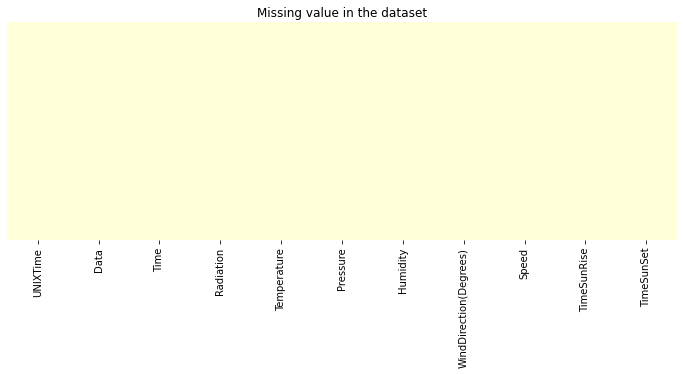

In [13]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='YlGnBu', yticklabels=False)
plt.title('Missing value in the dataset');

There is no missing values.

#### Now let's check if there is any categorical variables

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


Oh so we have some columns wityh object dtype.

For now we will sort our data with respect to UNIXTime.

In [15]:
df = df.sort_values(by=['UNIXTime'], ascending=True)
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7416,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


Next we will convert date and time parameters into more useful format and we will add some columns that will be useful for analysis. 

In [16]:
from pytz import timezone
import pytz

hawaii= timezone('Pacific/Honolulu')
df.index =  pd.to_datetime(df['UNIXTime'], unit='s')
df.index = df.index.tz_localize(pytz.utc).tz_convert(hawaii)

df['MonthOfYear'] = df.index.strftime('%m').astype(int)
df['DayOfYear'] = df.index.strftime('%j').astype(int)
df['WeekOfYear'] = df.index.strftime('%U').astype(int)
df['TimeOfDay(h)'] = df.index.hour
df['TimeOfDay(m)'] = df.index.hour*60 + df.index.minute
df['TimeOfDay(s)'] = df.index.hour*60*60 + df.index.minute*60 + df.index.second
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S')
df['DayLength(s)'] = df['TimeSunSet'].dt.hour*60*60 \
                           + df['TimeSunSet'].dt.minute*60 \
                           + df['TimeSunSet'].dt.second \
                           - df['TimeSunRise'].dt.hour*60*60 \
                           - df['TimeSunRise'].dt.minute*60 \
                           - df['TimeSunRise'].dt.second


Now let's drop the orginal column.

In [17]:
df.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
df.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,77.27,11.25,9,245,35,0,0,8,45060
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,153.44,9.00,9,245,35,0,5,310,45060
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,142.04,7.87,9,245,35,0,20,1206,45060
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,144.12,18.00,9,245,35,0,25,1505,45060
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,67.42,11.25,9,245,35,0,30,1809,45060


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32686 entries, 2016-09-01 00:00:08-10:00 to 2016-12-31 23:55:01-10:00
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Radiation               32686 non-null  float64
 2   Temperature             32686 non-null  int64  
 3   Pressure                32686 non-null  float64
 4   Humidity                32686 non-null  int64  
 5   WindDirection(Degrees)  32686 non-null  float64
 6   Speed                   32686 non-null  float64
 7   MonthOfYear             32686 non-null  int64  
 8   DayOfYear               32686 non-null  int64  
 9   WeekOfYear              32686 non-null  int64  
 10  TimeOfDay(h)            32686 non-null  int64  
 11  TimeOfDay(m)            32686 non-null  int64  
 12  TimeOfDay(s)            32686 non-null  int64  
 13  DayLength(s)            32686 non-null  int6

So we have cleaned our dataset and we are ready to do some exploratory analysis.

### Exploratory Data Analysis

In this section we will do some data analysis with Matplotlib and Seaborn, this two are common plotting libraries used in Python to create some great visualizations.

#### Ranges of various features

In [19]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,10.526066,306.110965,43.871015,11.557425,721.002203,43277.574068,41433.032491
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,1.096691,34.781367,4.963061,6.912034,415.011513,24900.749819,1795.873502
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,9.000000,245.000000,35.000000,0.000000,0.000000,1.000000,39360.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,10.000000,277.000000,40.000000,6.000000,360.000000,21617.000000,39720.000000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.000000,306.000000,44.000000,12.000000,720.000000,43230.000000,41040.000000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.000000,334.000000,48.000000,18.000000,1080.000000,64849.000000,42900.000000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.000000,366.000000,52.000000,23.000000,1436.000000,86185.000000,45060.000000


We can see here,

- The Solar Radiation ranges from 1 to 1600 W/m^2 with a mean radiation of 207.
- Temperture ranges from 34F to 71F with a mean of 51F.
- Wind direction is reasonable as it is ranges from 0 to 360 degree.

#### Let's plot Radiation as a Time series

Before plotting we will first set out plotting style.

In [20]:
plt.style.use('fivethirtyeight')

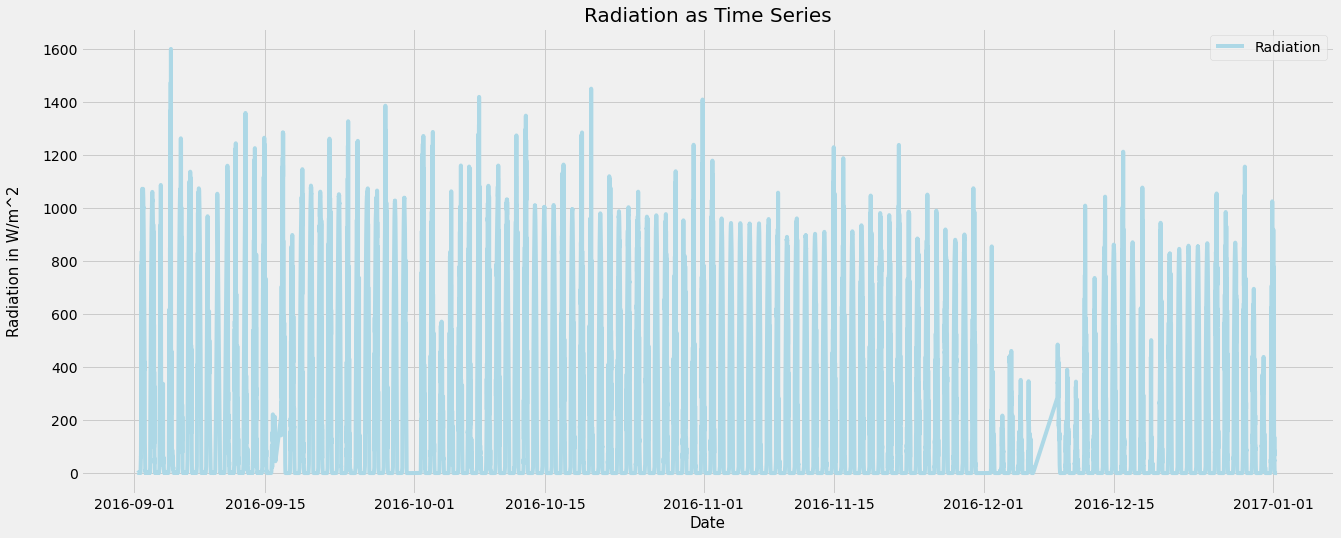

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(df['Radiation'],color='lightblue',label='Radiation');
ax.set_title('Radiation as Time Series', fontsize=20)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Radiation in W/m^2',fontsize=15,labelpad=20)
ax.legend();

#### Distribution of Data 

Now let's check distribution of dataset with Distplot

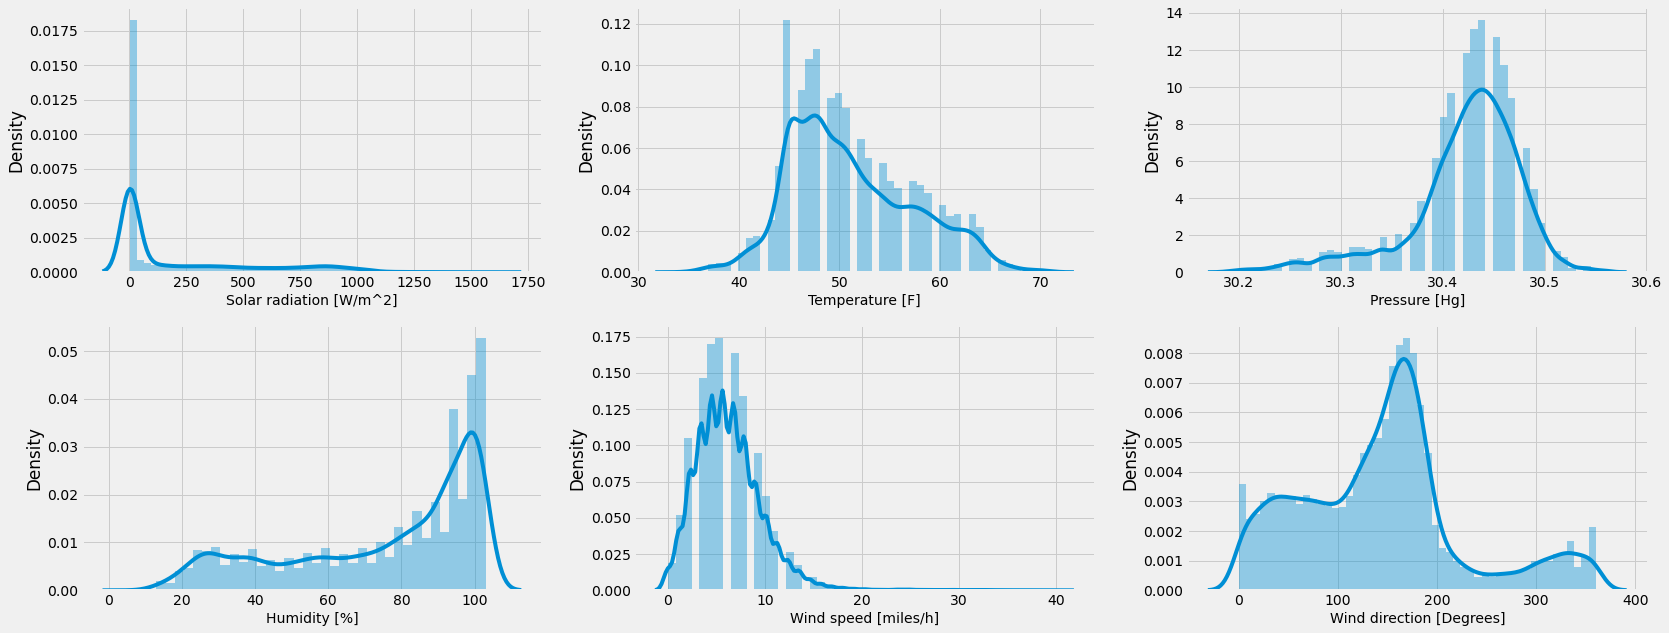

In [22]:
fig, ax = plt.subplots(nrows =2, ncols = 3, figsize = (25, 10))

sns.distplot(df.Radiation, ax = ax[0,0])
ax[0,0].set_xlabel('Solar radiation [W/m^2]', fontsize = 14)

sns.distplot(df.Temperature, ax = ax[0,1])
ax[0,1].set_xlabel('Temperature [F]', fontsize = 14)

sns.distplot(df.Pressure, ax = ax[0,2])
ax[0,2].set_xlabel('Pressure [Hg]', fontsize = 14)

sns.distplot(df.Humidity, ax = ax[1,0])
ax[1,0].set_xlabel('Humidity [%]', fontsize = 14)

sns.distplot(df.Speed, ax = ax[1,1])
ax[1,1].set_xlabel('Wind speed [miles/h]', fontsize = 14)

sns.distplot(df['WindDirection(Degrees)'], ax = ax[1,2])
ax[1,2].set_xlabel('Wind direction [Degrees]', fontsize = 14);



#### With BoxPlot

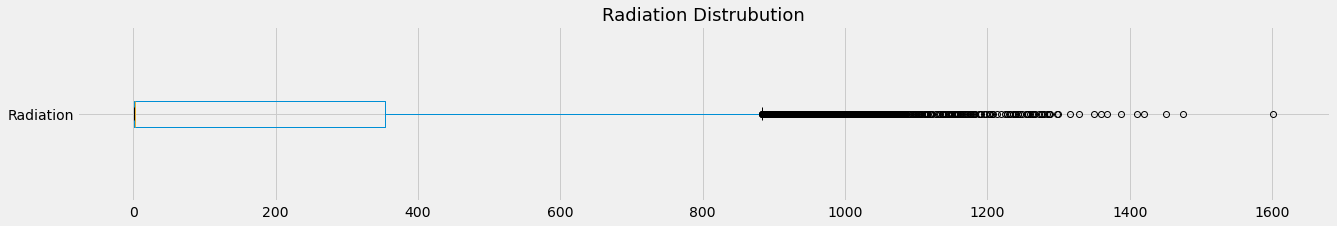

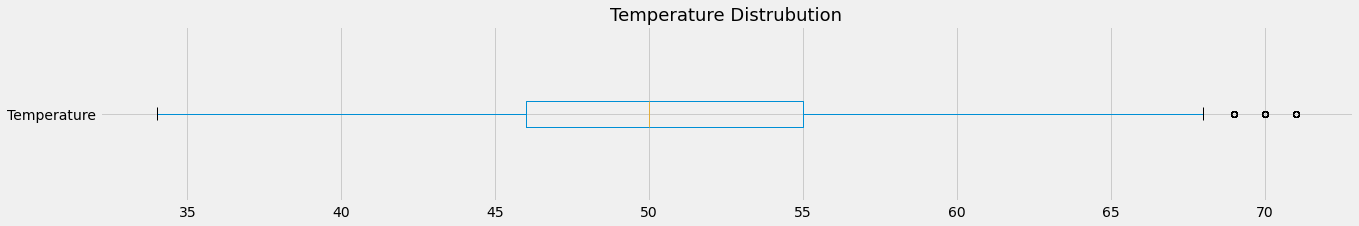

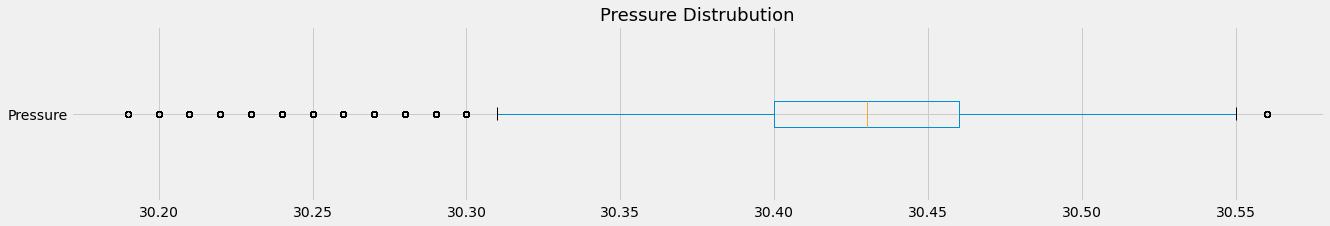

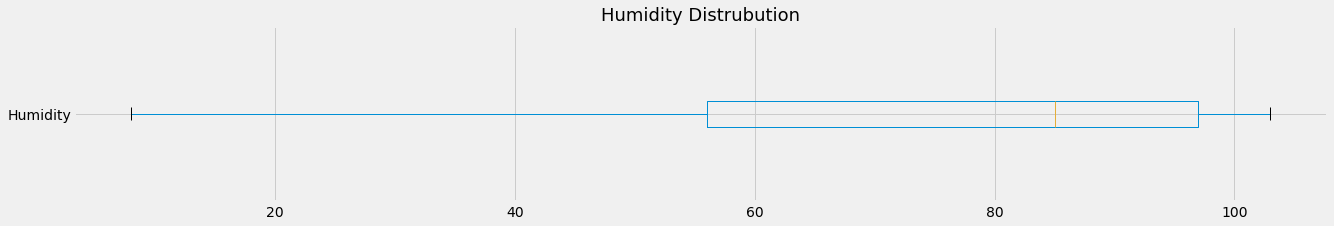

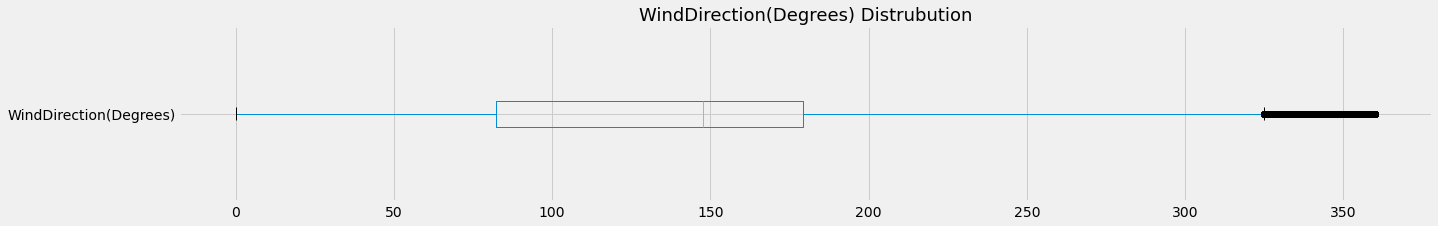

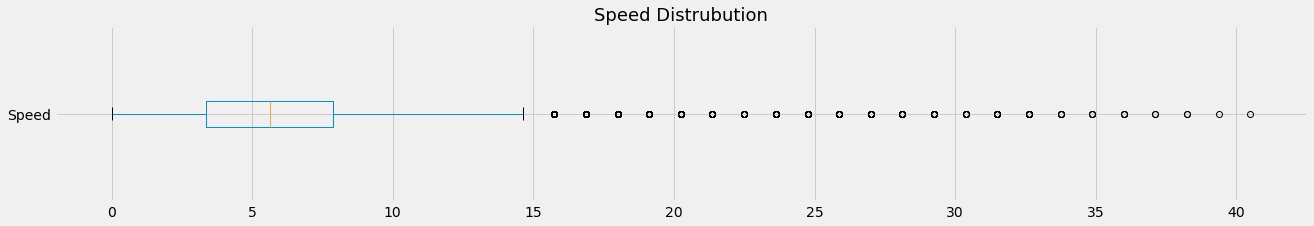

In [23]:
for col in ['Radiation','Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']:
    fig, ax = plt.subplots(figsize=(20, 3))
    df[col].plot.box(ax=ax, vert=False)
    ax.set_title(f'{col} Distrubution', fontsize=18)
    plt.show()

After looking through the distribution we can possibly say that all the distribution are skewed except for Wind Direction.

#### Let's plot mean values with respect to hour of the day and month of the year

To get more information from dataset we going to plot some features with respect to hour and month.

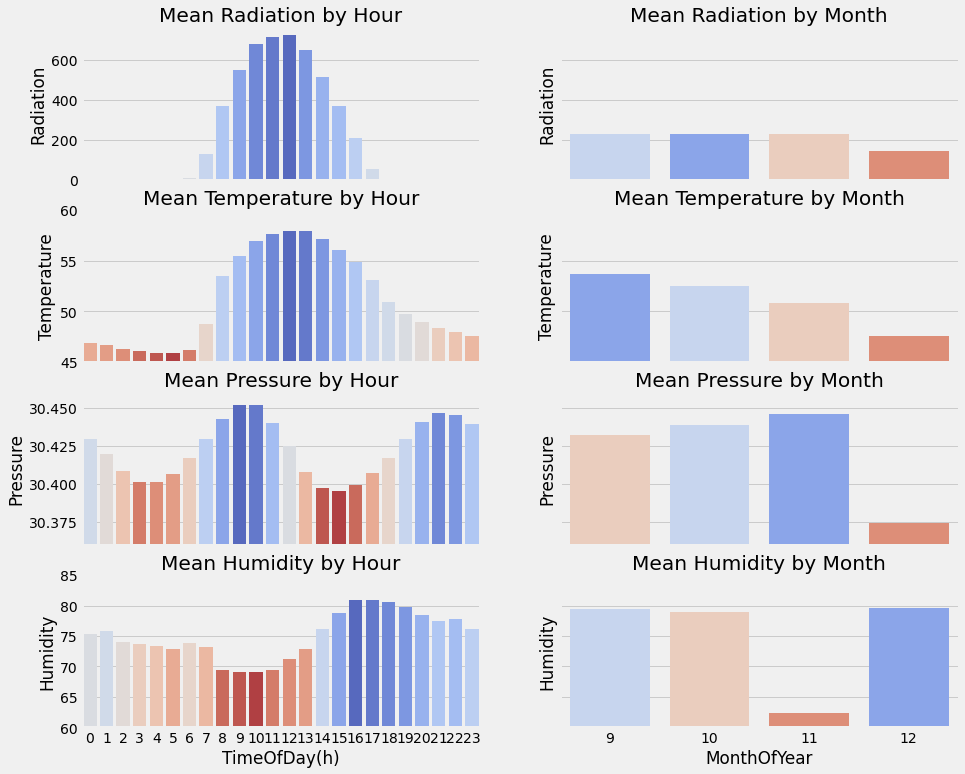

In [24]:
grouped_m=df.groupby('MonthOfYear').mean().reset_index()
grouped_w=df.groupby('WeekOfYear').mean().reset_index()
grouped_d=df.groupby('DayOfYear').mean().reset_index()
grouped_h=df.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("coolwarm", len(grouped_h))
rank = grouped_h['Radiation'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Radiation', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("coolwarm", len(grouped_m))
rank = grouped_m['Radiation'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Radiation', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("coolwarm", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("coolwarm", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("coolwarm", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("coolwarm", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("coolwarm", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("coolwarm", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

After going thorugh all the plots we can see that,
 
 - The temperature is high during 8am to 5pm therefore the radiation is also at that time of day, therefore we can see that this two feature is highly correlated.
 - Also we can see that humidity is maybe negative correlated with temperature and radiation.
 - Humidity is less in November compare to other 3 months and pressure is less in December compare to other months.

### Correlation Analysis

In this section we will cover correlation analysis.

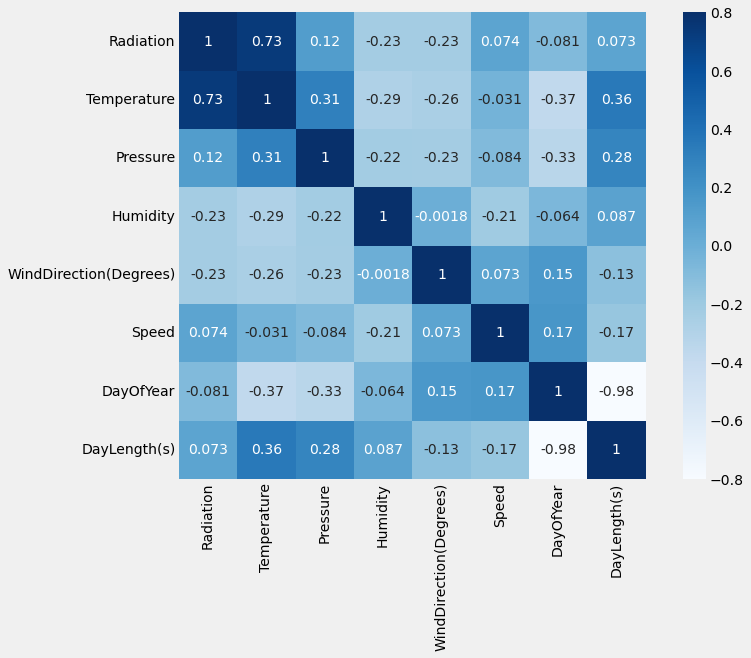

In [25]:
corrmat = df.drop(['TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)', 'UNIXTime', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)
corrmat = corrmat.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'Blues', annot=True)
plt.show()

We can see that **Temperature** and **Radiation** have high correlation as we have already seen in BarPlot.

Before modeling let's reset our index.

In [26]:
df.reset_index(drop=True,inplace=True)
df.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
0,1472724008,2.58,51,30.43,103,77.27,11.25,9,245,35,0,0,8,45060
1,1472724310,2.83,51,30.43,103,153.44,9.00,9,245,35,0,5,310,45060
2,1472725206,2.16,51,30.43,103,142.04,7.87,9,245,35,0,20,1206,45060
3,1472725505,2.21,51,30.43,103,144.12,18.00,9,245,35,0,25,1505,45060
4,1472725809,2.25,51,30.43,103,67.42,11.25,9,245,35,0,30,1809,45060


Okay so we are now ready to built our own model.

### Modeling

#### Getting X an y and splitting into Training and Test dataset

In [27]:
from sklearn.model_selection import train_test_split

#getting X and y
X = df.drop('Radiation',axis=1)
y = df['Radiation']

#splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#checking shape 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26148, 13), (26148,), (6538, 13), (6538,))

#### Importing models

In [28]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

#### Importing metrics

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

For this data we will be using **RMSE(Root Mean Squared Error)** and **MAE(Mean Absolute Error)** metrics to evaluate our model.

#### Building model

For this we will loop through various model and then we will fit on our training dataset and then we will evaluate on testing dataset. 

In [30]:
models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'ExtraTreeRegressor': ExtraTreesRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'Linear': LinearRegression(),
    'Ridge': Ridge()
}

In [31]:
#helper function for fitting the model
def fit_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Function to fit and evaluate the model.
    """
    np.random.seed(42)
    
    for name,model in models.items():
        #fitting the model
        model.fit(X_train,y_train)
        
        #getting predictions
        preds = model.predict(X_test)
        
        #getting MAE and RMSE
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        
        print(f'MAE of {name} is {mae}')
        print(f'RMSE of {name} is {rmse}')
        print()
        

In [32]:
fit_evaluate(models, X_train, X_test, y_train, y_test)

MAE of RandomForestRegressor is 28.06147815845824
RMSE of RandomForestRegressor is 74.66553553375212

MAE of GradientBoostingRegressor is 56.05597346028478
RMSE of GradientBoostingRegressor is 103.70089048327166

MAE of AdaBoostRegressor is 82.01641769990637
RMSE of AdaBoostRegressor is 130.96473951634147

MAE of ExtraTreeRegressor is 26.208448531661055
RMSE of ExtraTreeRegressor is 73.36793165507255

MAE of DecisionTreeRegressor is 35.78035026001835
RMSE of DecisionTreeRegressor is 104.9570456960901

MAE of Linear is 143.81972747681323
RMSE of Linear is 188.9276040052847

MAE of Ridge is 143.829705898844
RMSE of Ridge is 188.9276112614823



So we can see that **RandomForestRegressor** and **ExtraTreeRegressor** performs well compare to other models.

Let's plot this

In [33]:
index = ['RandomForest', 'GradientBoost', 'AdaBoost', 'ExtraTrees', 'DecisionTree', 'Linear', 'Ridge']
mae = [29.2731, 56.70, 84.8318, 27.7574, 35.7447, 143.81, 143.82]
rmse = [77.9813, 103.7018, 131.7871, 77.0187, 104.9359, 188.9276, 188.9261]

evaluation = pd.DataFrame(index=index)
evaluation['Mean Absolute Error'] = mae
evaluation['Root Mean Squared Error'] = rmse

In [34]:
evaluation

,Mean Absolute Error,Root Mean Squared Error
RandomForest,29.2731,77.9813
GradientBoost,56.7000,103.7018
AdaBoost,84.8318,131.7871
ExtraTrees,27.7574,77.0187
DecisionTree,35.7447,104.9359
Linear,143.8100,188.9276
Ridge,143.8200,188.9261


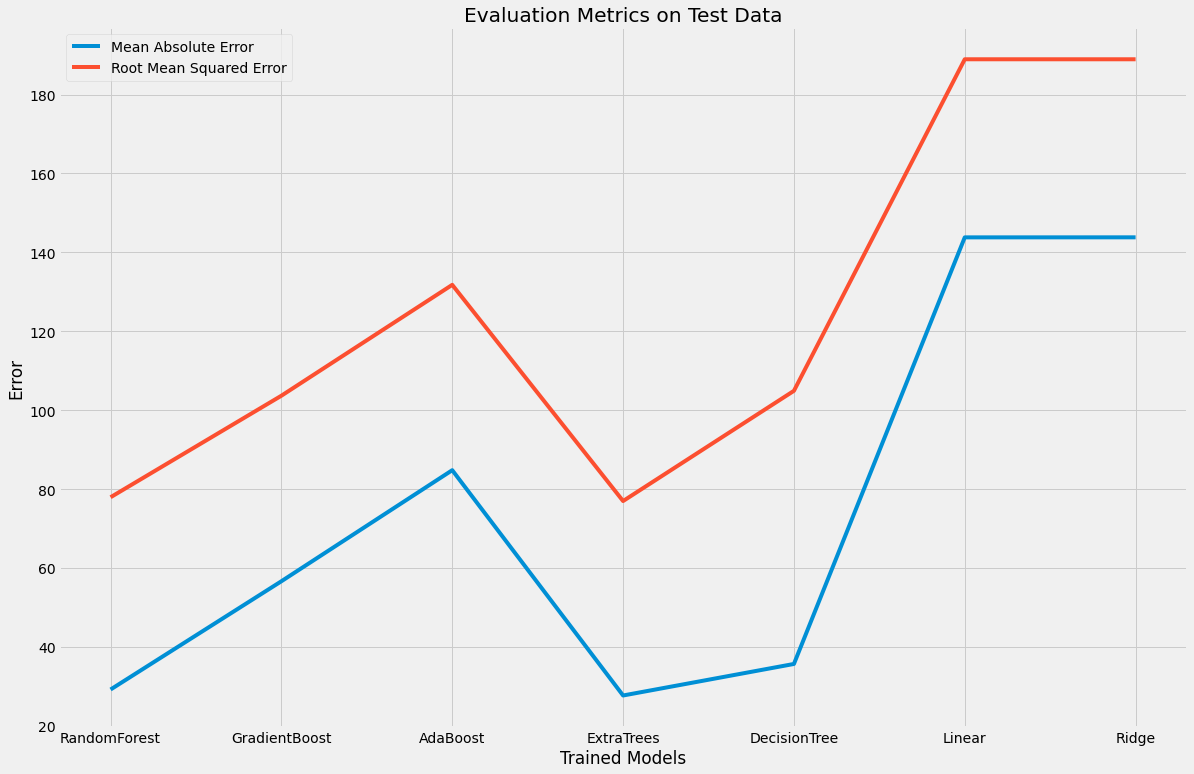

In [35]:
fig,ax = plt.subplots(figsize=(18,12))
evaluation['Mean Absolute Error'].plot()
evaluation['Root Mean Squared Error'].plot()
ax.set_title('Evaluation Metrics on Test Data')
ax.set_xlabel('Trained Models')
ax.set_ylabel('Error')
ax.legend();

Now with the help of visualization we can clearly see that **RandomForestRegressor** and **ExtraTreesRegressor** outperforms every other model.

### Hypertuning 

In this section we will hypertune our two models that is RandomForest and ExtraTree

 - RandomForestRegressor

In [36]:
#parameter grids for RandomForest
random_grids = {
    'n_estimators': [10,100,200,500],
    'max_depth': [None,1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2']
}


#using Randomized Search CV
random_rs = RandomizedSearchCV(RandomForestRegressor(),
                               random_grids,
                               cv=5,
                               n_iter=10,
                               random_state=42,
                               n_jobs=-1,
                               verbose=True)

random_rs.fit(X_train, y_train)

print(random_rs.best_params_)

#evaluating
preds_rs = random_rs.predict(X_test)
mae_rs = mean_absolute_error(y_test,preds_rs)
rmse_rs = np.sqrt(mean_squared_error(y_test, preds_rs))
print(f'MAE: {mae_rs}, RMSE: {rmse_rs}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None}
MAE: 27.301702248394005, RMSE: 71.89498904347249


So we can see **hypertuning RandomForest decreases the MAE around by 2 and RMSE around by 6**, that's good.

Now let's Hypertune ExtraTrees

 - ExtraTreesRegressor

In [38]:
#parameter grids for ExtraTrees
extra_grids = {
    'n_estimators': [10,100,200,500],
    'max_depth': [None,1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2']
}


#using Randomized Search CV
extra_rs = RandomizedSearchCV(ExtraTreesRegressor(),
                               extra_grids,
                               cv=5,
                               n_iter=10,
                               random_state=42,
                               n_jobs=-1,
                               verbose=True)

extra_rs.fit(X_train, y_train)

print(extra_rs.best_params_)

#evaluating
preds_rs_extra = extra_rs.predict(X_test)
mae_rs_extra = mean_absolute_error(y_test,preds_rs_extra)
rmse_rs_extra = np.sqrt(mean_squared_error(y_test, preds_rs_extra))
print(f'MAE: {mae_rs_extra}, RMSE: {rmse_rs_extra}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None}
MAE: 26.953211830835116, RMSE: 72.45375651855092


So compare to baseline ExtraTree, **hypertuned ExtraTrees performs well as it decreases the MAE by 1 and RMSE by 5**.

Let's plot this.

In [43]:
index = ['Baseline RandomForest', 'Baseline ExtraTrees', 'Hypertuned RandomForest', 'Hypertuned ExtraTrees']
hp_mae = [29.2731, 27.7574, 27.3017, 26.9532 ]
hp_rmse = [77.9813, 77.0187, 71.8949, 72.4537]

hp_evaluation = pd.DataFrame(index=index)
hp_evaluation['Mean Absolute Error'] = hp_mae
hp_evaluation['Root Mean Squared Error'] = hp_rmse

In [44]:
hp_evaluation

,Mean Absolute Error,Root Mean Squared Error
Baseline RandomForest,29.2731,77.9813
Baseline ExtraTrees,27.7574,77.0187
Hypertuned RandomForest,27.3017,71.8949
Hypertuned ExtraTrees,26.9532,72.4537


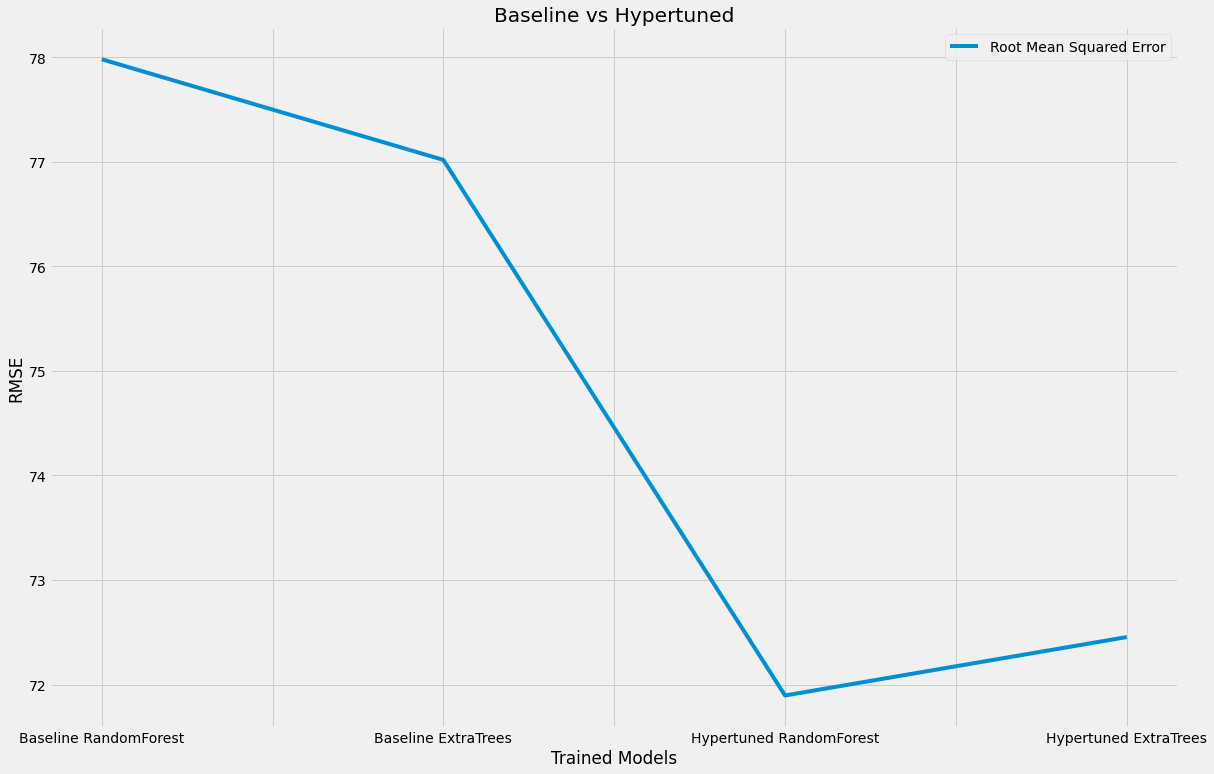

In [49]:
fig,ax = plt.subplots(figsize=(18,12))
hp_evaluation['Root Mean Squared Error'].plot()
ax.set_title('Baseline vs Hypertuned')
ax.set_xlabel('Trained Models')
ax.set_ylabel('RMSE')
ax.legend();

So we can clearly see that our **Hypertuned RandomForest performs well**, we only plotted RMSE but not MAE because RMSE is good evaluation metric compared to MAE.

Now Let's do GridSearchCV on RandomForestRegressor.

#### GridSearchCV

In [53]:
#parameter grids for RandomForest
random_grids = {
    'n_estimators': [10,100,200],
    'max_depth': [None,1,2],
    'max_features': ['auto', 'sqrt']
}


np.random.seed(42)
#using Grid Search CV
random_gs = GridSearchCV(RandomForestRegressor(),
                               random_grids,
                               cv=5,
                               n_jobs=-1,
                               verbose=True)

random_gs.fit(X_train, y_train)

print(random_gs.best_params_)

#evaluating
preds_gs = random_gs.predict(X_test)
mae_gs = mean_absolute_error(y_test,preds_gs)
rmse_gs = np.sqrt(mean_squared_error(y_test, preds_gs))
print(f'MAE: {mae_gs}, RMSE: {rmse_gs}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
MAE: 26.977727210156015, RMSE: 71.74898143364268


Okay so we got **good RMSE and MAE compared to RandomizedSearch RandomForest**,
 - **RandomizedSearchCV: MAE= 27.3017, RMSE= 71.8949**

 - **GridSearchCV: MAE= 26.97, RMSE= 71.7489**

So we will fit our final model with GridSearchCV parameters.

### Fitting our final model

In [54]:
final_model = RandomForestRegressor(max_depth=None,
                                    max_features='sqrt',
                                    n_estimators=200, 
                                    random_state=42)

final_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=42)

### Feature Importance

In [70]:
feature_dict = dict(zip(df.columns,list(final_model.feature_importances_))) 
feature_dict

{'UNIXTime': 0.03424910062877017,
 'Radiation': 0.2555855111509874,
 'Temperature': 0.012400519746068907,
 'Pressure': 0.05951333250341229,
 'Humidity': 0.06888730152684397,
 'WindDirection(Degrees)': 0.008193316755105377,
 'Speed': 0.004364401748478195,
 'MonthOfYear': 0.020277122929879758,
 'DayOfYear': 0.009502438022539762,
 'WeekOfYear': 0.11941255795298017,
 'TimeOfDay(h)': 0.178567311976664,
 'TimeOfDay(m)': 0.21331180546103126,
 'TimeOfDay(s)': 0.015735279597238905}

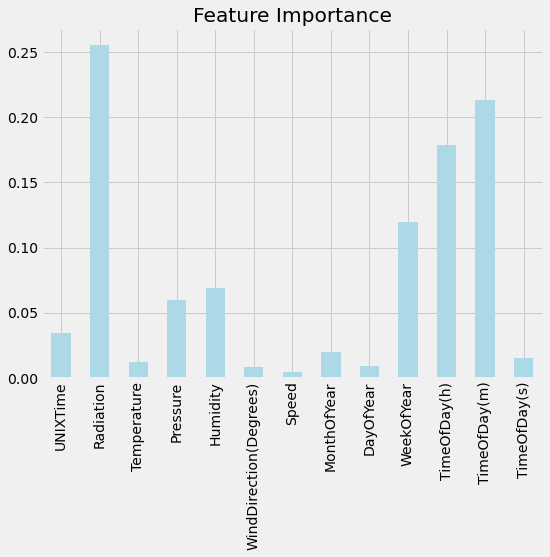

In [71]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False,color='lightblue',figsize=(8,6));

### Wrapping Up

So we have cleaned our dataset, after cleaning we did Exploratory Data Analysis and after doing EDA we have discovered that temperature is highly correlated with the radiation and humidity negatively correlated with radiation.

After EDA we splitted our data ino target and predictive variable and then split the dataset into training and testing dataset for evaluation. Then we fitted and compare our dataset for seven models and we have discovered that RandomForestRegressor and ExtraTreesRegressor performs pretty good with Root Mean Squared Error of **77.98** and **77.01** respectively.

We further hypertuned our baseline model with RandomizedSerachCv and GridSearchCv, after hypertuning we have discovered that **hypertuned RandomForestRegressor** performs well. Then we fitted our Hypertuned RandomForestRegressor on training dataset.